<a href="https://colab.research.google.com/github/priyatham-18/Homework/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
cars=pd.read_csv(file_name)

Saving Cars.csv to Cars.csv


In [ ]:
cars.shape


(81, 5)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


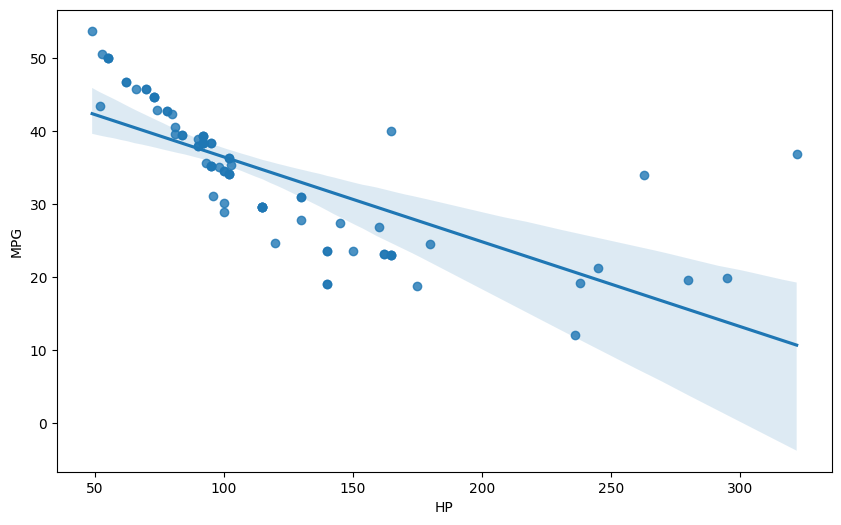

In [ ]:
# prompt: implement scatterplot

import matplotlib.pyplot as plt
#Plotting Scatter plot
plt.figure(figsize=(10,6))
sns.regplot(x='HP',y='MPG',data=cars)
plt.show()


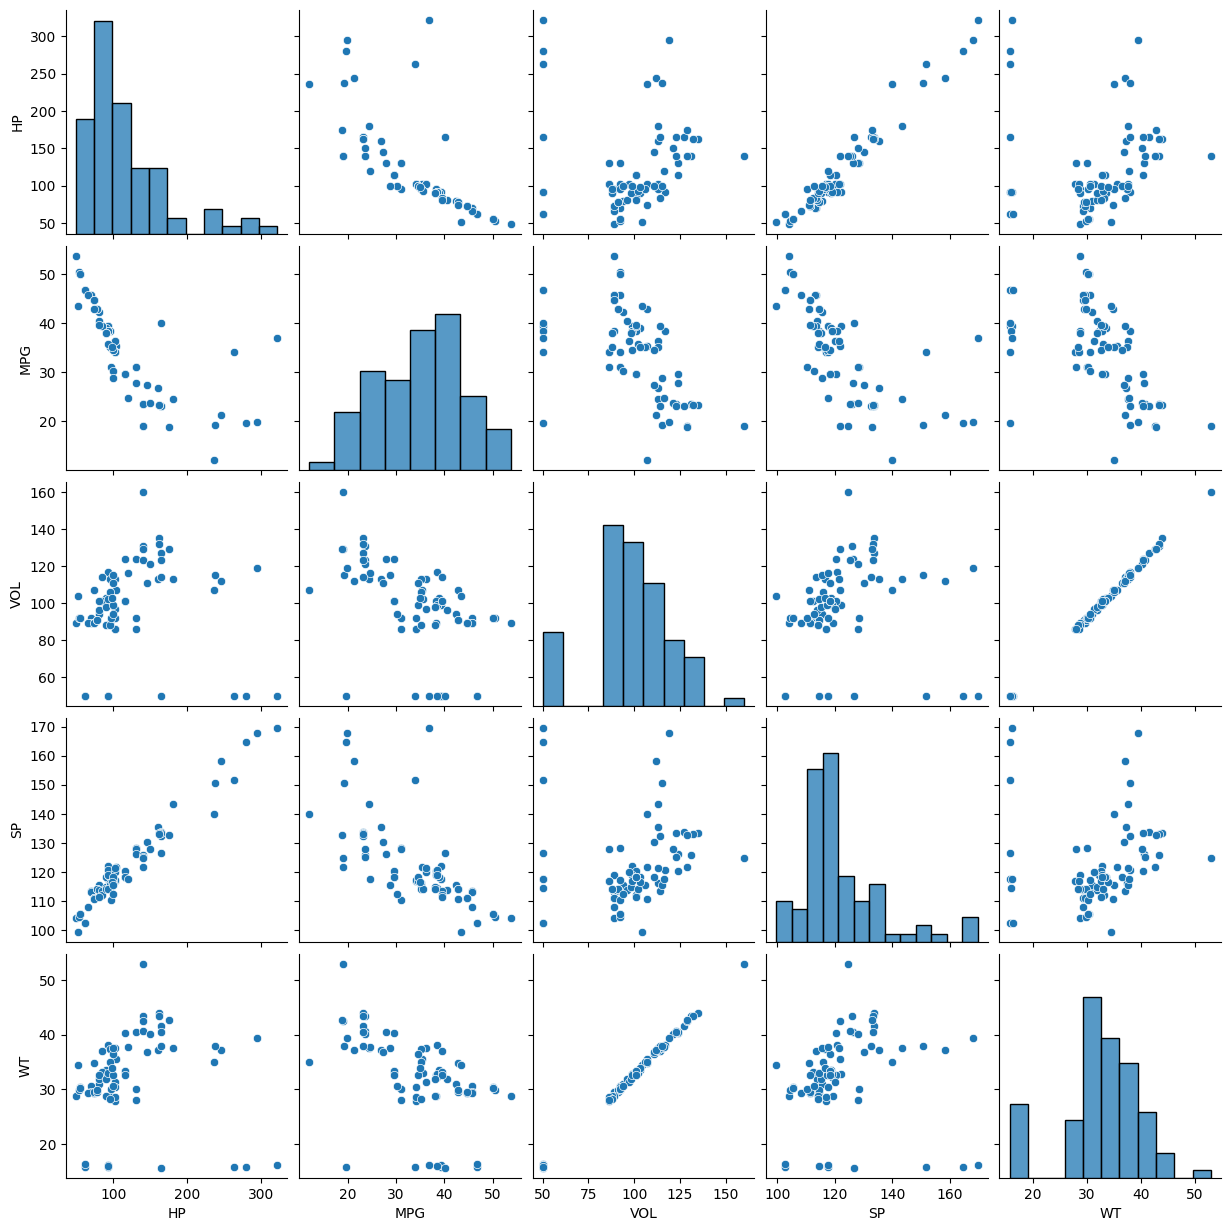

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(cars)
plt.show()



In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP',data=cars).fit()


In [ ]:
model.params

,0
Intercept,104.470477
WT,1.606615
VOL,-0.729199
SP,-0.412236


In [ ]:
  (model.rsquared,model.rsquared_adj)

(0.6876760478006347, 0.6755075821305296)

In [ ]:
ml_c=smf.ols('MPG~WT+VOL+SP',data=cars).fit()
print(ml_c.tvalues, '\n', ml_c.pvalues)

Intercept    18.552999
WT            0.826188
VOL          -1.116129
SP           -9.999396
dtype: float64 
 Intercept    3.858730e-30
WT           4.112502e-01
VOL          2.678381e-01
SP           1.449470e-15
dtype: float64


In [ ]:
ml_WV=smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_WV.tvalues, '\n', ml_WV.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [ ]:
ml_V=smf.ols('MPG~VOL',data = cars).fit()
print(ml_V.tvalues, '\n', ml_V.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
rsq_hp = 1/(1-rsq_hp)
rsp_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
rsp_wt = 1/(1-rsp_wt)
rsp_vol=smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
rsp_vol=1/(1-rsp_vol)
rsp_sp=smf.ols('SP~HP+WT+VOL',data=cars).fit().rsquared
rsp_sp=1/(1-rsp_sp)
d1={'Variables':['HP','WT','VOL','SP'],'Rsquared':[rsq_hp,rsp_wt,rsp_vol,rsp_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,Rsquared
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


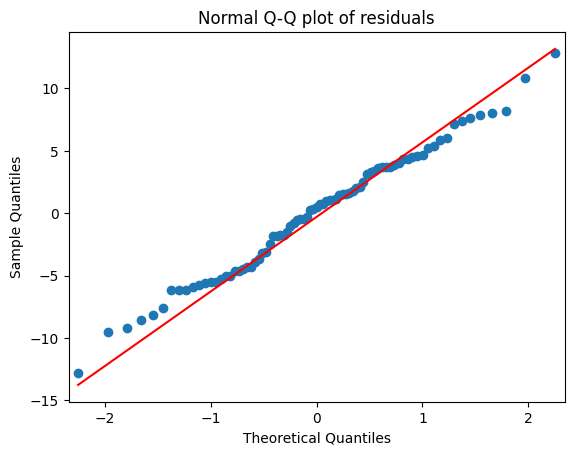

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(model.resid>25))

[array([], dtype=int64)]

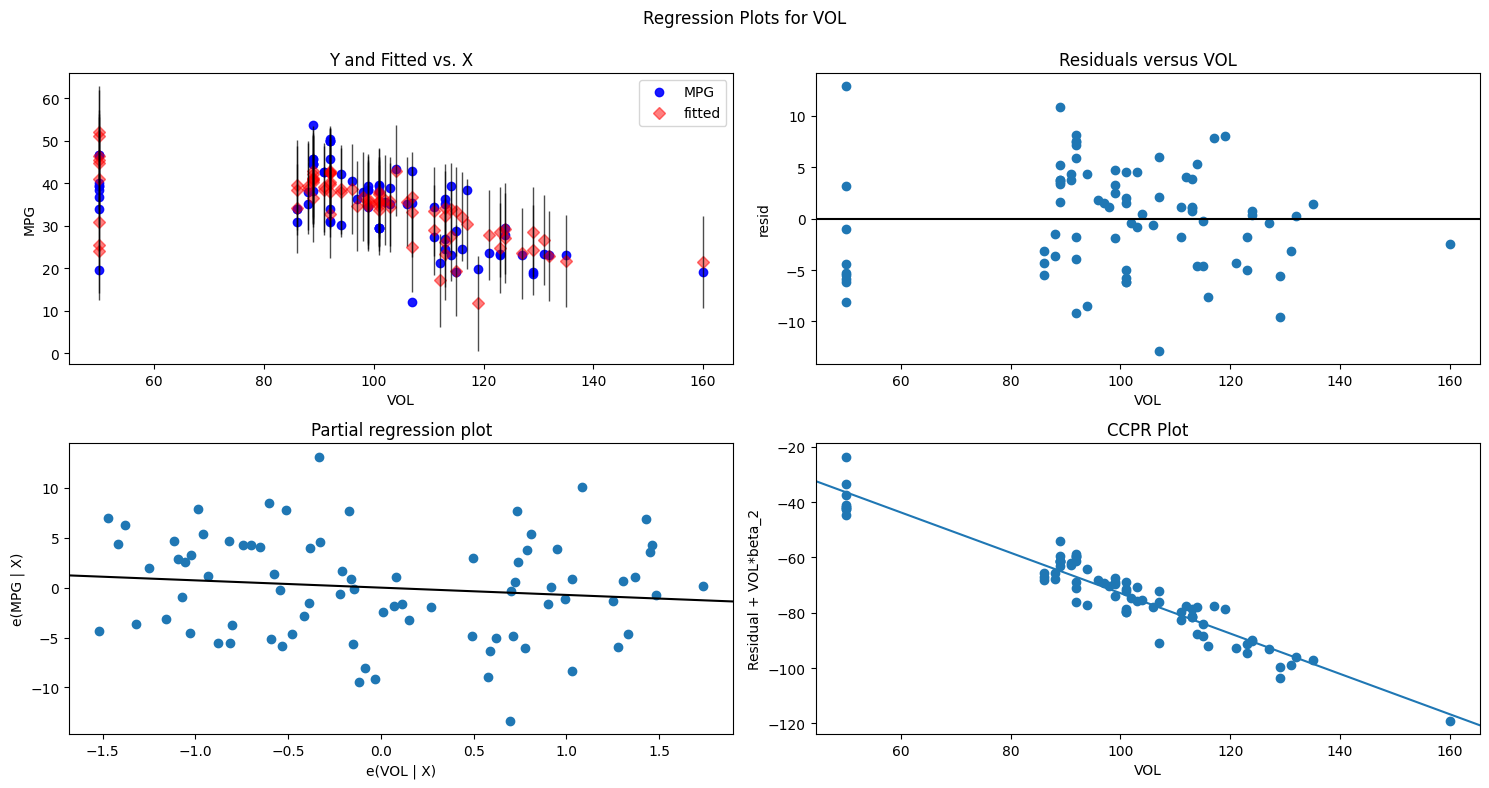

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

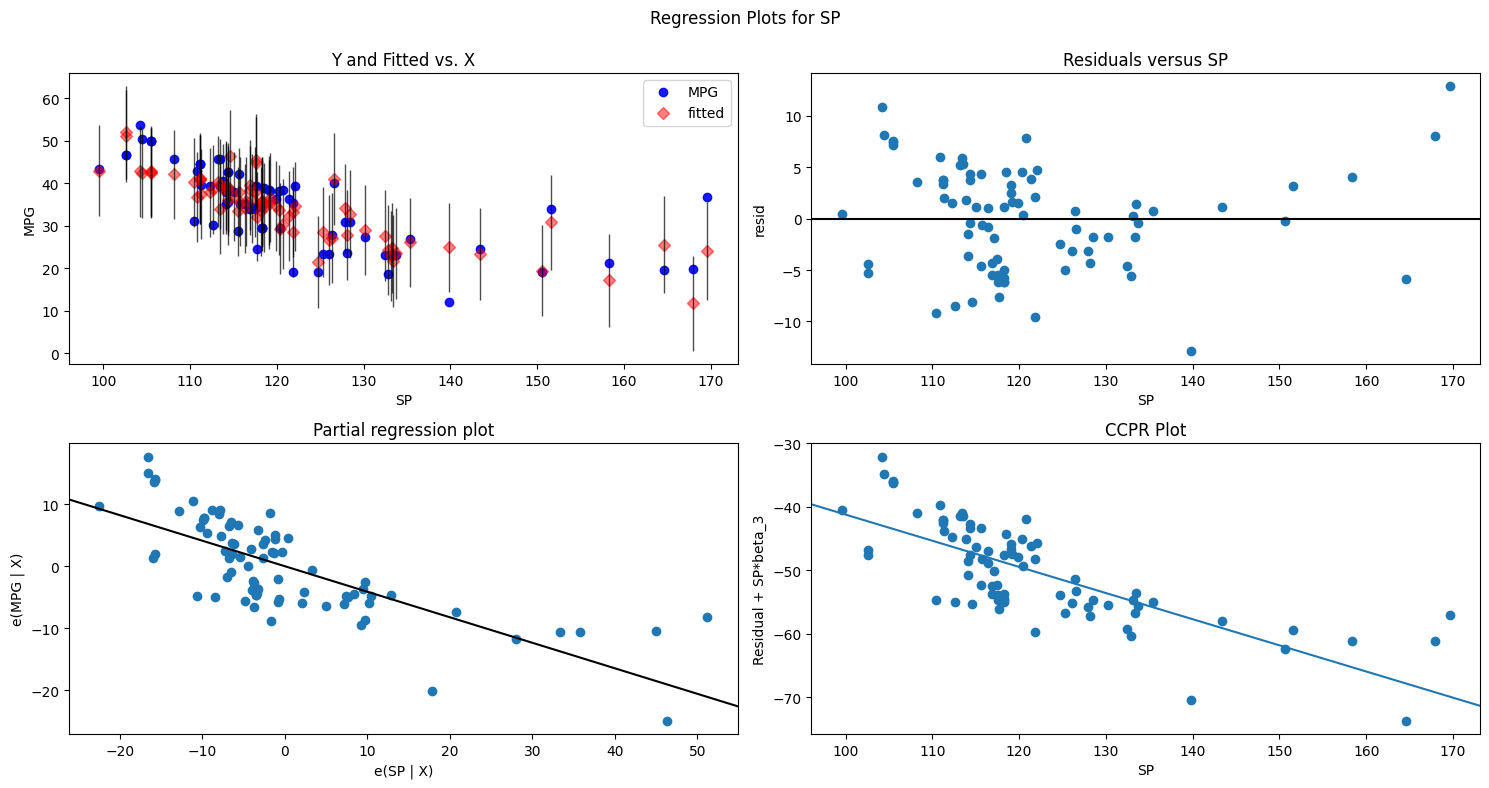

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

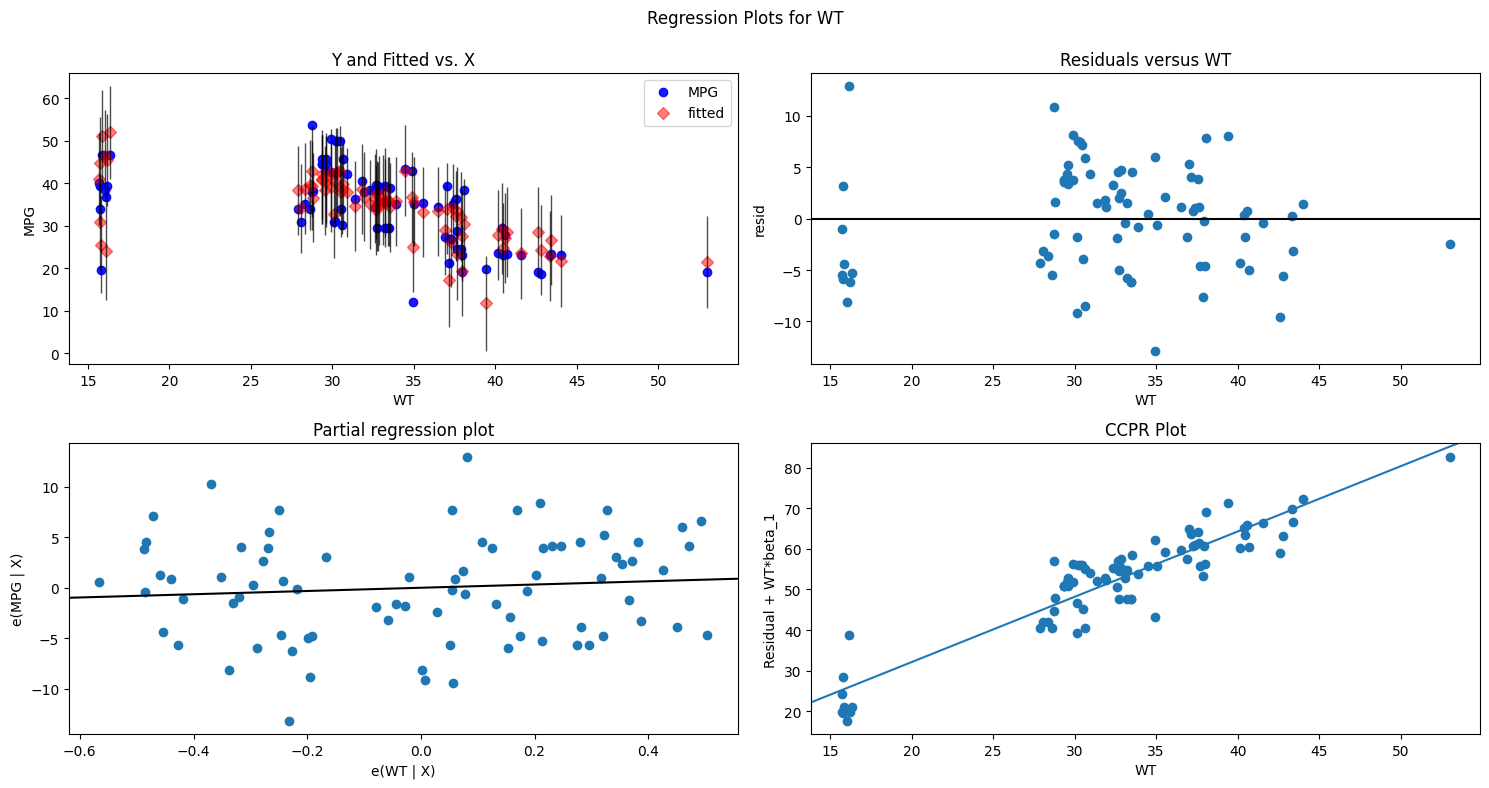

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [ ]:
new_data=pd.Dataframe({'HP':40,"VOL":95,})